## Data Preparation


One of the first things we should do, as we want to test our final model on unseen/unbiased data is to divide the data into train and test set.

to make sure that the train and test set represent the overall population and not just a few specific categories we are going to use stratified sampling method from sklearn. read more about by following this link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

In [41]:
# importing necessary ibraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
##Using Pipeline class
from sklearn.pipeline import Pipeline
##Using StandardScaler to scale all the numerical attributes
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
##handling missing values
from sklearn.impute import SimpleImputer
##onehotencoding the categorical values
from sklearn.preprocessing import OneHotEncoder


import warnings
warnings.filterwarnings('ignore')

based on the did prevusly, We re going to use the Cylinder column to create the strata

In [42]:
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('../data/auto_mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Cylinders"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

Let's check the cylinder category distribution in the train and test set

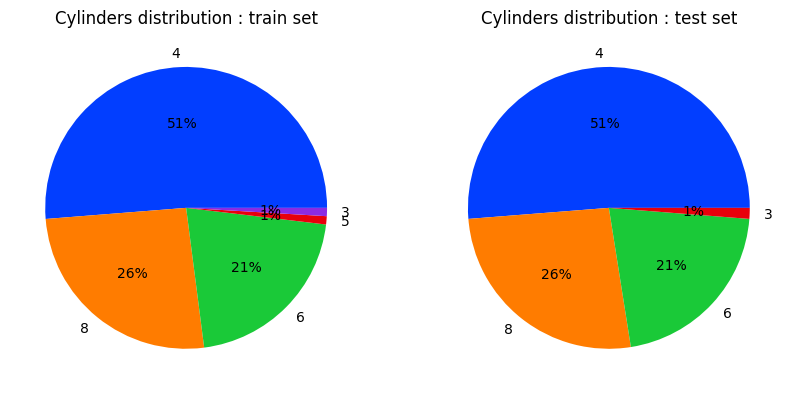

In [43]:
palette_color = sns.color_palette('bright')

plt.figure(figsize=(10,5))
for i, df in enumerate([train_set,test_set], start=1):
    # declaring data
    data = df["Cylinders"].value_counts().values
    keys = df["Cylinders"].value_counts().index
    plt.subplot(1,2,i)
    # plotting data on chart
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    if i==1:
        plt.title('Cylinders distribution : train set')
    else:
        plt.title('Cylinders distribution : test set')
# displaying chart
plt.show()

As from now, we are going to work only on the training data set. the test set will be use when we are done with the modeling and happy with the model

In [44]:
train_set.to_csv('../data/train_set.csv',index=False)
test_set.to_csv('../data/test_set.csv',index=False)

Split the train set into Target and Feature variables

In [45]:
X_train = train_set.drop("MPG", axis=1)
y_train = train_set["MPG"].copy()

let's now build a pipeline that will handle all transformation 

Preprocessing the Origin Column
One Hot Encoding the Origin Column
Handling Missing values using SimpleImputer

In [46]:
num_attrs = ['Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year']
cat_attrs = ["Origin"]
final_attrs = ['Germany', 'India', 'USA'] + num_attrs

In [47]:
class CustomColTransfomer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self  
    
    def transform(self, X, y=None):
        X["Origin"] = X["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
        return X
    


In [48]:
num_data = X_train[num_attrs]

##pipeline for numerical attributes
##imputing -> scale them
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

cat_pipeline = Pipeline ([
        ('col_map', CustomColTransfomer()),
        ('encoder', OneHotEncoder())
])



In [49]:
##complete pipeline to transform 
##both numerical and cat. attributes
final_pipeline = ColumnTransformer([
        ("cat", cat_pipeline, cat_attrs),
        ("num", num_pipeline, num_attrs)
    ])

prepared_data = final_pipeline.fit_transform(X_train)


In [51]:
pd.DataFrame(prepared_data, columns=final_attrs)


,Germany,India,USA,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
Germany,1.000000,-0.619452,-0.232558,-0.389385,-0.436328,-0.333003,-0.456224,0.109836,0.239241
India,-0.619452,1.000000,-0.619452,0.605646,0.660910,0.494165,0.601044,-0.255691,-0.136846
USA,-0.232558,-0.619452,1.000000,-0.360952,-0.382476,-0.279220,-0.288412,0.206940,-0.069701
Cylinders,-0.389385,0.605646,-0.360952,1.000000,0.951331,0.841877,0.891710,-0.510821,-0.330833
Displacement,-0.436328,0.660910,-0.382476,0.951331,1.000000,0.893440,0.934039,-0.545550,-0.357978
Horsepower,-0.333003,0.494165,-0.279220,0.841877,0.893440,1.000000,0.867010,-0.681489,-0.392889
Weight,-0.456224,0.601044,-0.288412,0.891710,0.934039,0.867010,1.000000,-0.410535,-0.290754
Acceleration,0.109836,-0.255691,0.206940,-0.510821,-0.545550,-0.681489,-0.410535,1.000000,0.263095
Model Year,0.239241,-0.136846,-0.069701,-0.330833,-0.357978,-0.392889,-0.290754,0.263095,1.000000
